In [1]:
pwd

'/home/rusty/src/microplastic_sfbay/postprocess'

In [54]:
import six
import numpy as np
import matplotlib.pyplot as plt
from stompy import utils
import xarray as xr
from matplotlib import colors
%matplotlib notebook

In [59]:
import postprocess_v00 as post
six.moves.reload_module(post)

<module 'postprocess_v00' from '/home/rusty/src/microplastic_sfbay/postprocess/postprocess_v00.py'>

In [10]:
ptm_runs=[                                                                                                                                             
        post.PtmRun(run_dir="/opt2/sfb_ocean/ptm/all_source/20170615/w-0.05"),                                                                                  
        post.PtmRun(run_dir="/opt2/sfb_ocean/ptm/all_source/20170615/w-0.005"),                                                                                 
        post.PtmRun(run_dir="/opt2/sfb_ocean/ptm/all_source/20170615/w-0.0005"),                                                                                
        post.PtmRun(run_dir="/opt2/sfb_ocean/ptm/all_source/20170615/w0.0"),                                                                                    
        post.PtmRun(run_dir="/opt2/sfb_ocean/ptm/all_source/20170615/w0.0005"),                                                                                 
        post.PtmRun(run_dir="/opt2/sfb_ocean/ptm/all_source/20170615/w0.005"),                                                                                  
        post.PtmRun(run_dir="/opt2/sfb_ocean/ptm/all_source/20170615/w0.05"),                                                                                   
]                                                                                                                                                      

grid_fn="/opt2/sfb_ocean/suntans/runs/merged_018_20171227/ptm_average.nc_0000.nc"                                                        
grid=post.grid_from_ptm_hydro(grid_fn)
 
group_patt='.*_down500'        

In [78]:
six.moves.reload_module(post)

<module 'postprocess_v00' from '/home/rusty/src/microplastic_sfbay/postprocess/postprocess_v00.py'>

In [ ]:
# A 1 hour window gives 27k particles
part_obs=post.query_runs(ptm_runs,
                         group_patt=group_patt,
                         time_range=[np.datetime64("2017-07-30 00:00"),
                                     np.datetime64("2017-07-31 00:00")],
                         z_range=None, # not ready
                         max_age=np.timedelta64(50,'D'),
                         conc_func=post.conc_func,
                         grid=grid)

INFO:root:/opt2/sfb_ocean/ptm/all_source/20170615/w-0.05: sunnyvale_down50000
INFO:root:Read beyond the time range. Done with this group
INFO:root:/opt2/sfb_ocean/ptm/all_source/20170615/w-0.05: src001_down50000
INFO:root:Read beyond the time range. Done with this group
INFO:root:/opt2/sfb_ocean/ptm/all_source/20170615/w-0.05: petaluma_down50000
INFO:root:Will skip source petaluma -- it's in skip_source
INFO:root:/opt2/sfb_ocean/ptm/all_source/20170615/w-0.05: src000_down50000
INFO:root:Read beyond the time range. Done with this group
INFO:root:/opt2/sfb_ocean/ptm/all_source/20170615/w-0.05: SCLARAVCc_down50000
INFO:root:Read beyond the time range. Done with this group
INFO:root:/opt2/sfb_ocean/ptm/all_source/20170615/w-0.05: UALAMEDA_down50000
INFO:root:Read beyond the time range. Done with this group
INFO:root:/opt2/sfb_ocean/ptm/all_source/20170615/w-0.05: NAPA_down50000
INFO:root:Read beyond the time range. Done with this group
INFO:root:/opt2/sfb_ocean/ptm/all_source/20170615/w-0.

In [80]:
# set up ptm_runs with a small set of local runs.
# make sure that we're reading the correct grid, presumably
# by reading the ptm_average file from the first ptm_run
# and using the one-off code in postprocess_v00.py to
# load as a grid.
# check to see that when the right grid is in use, part_hab
# is well behaved.

part_filtered=post.filter_by_z_range(part_obs,[0.0,0.5],grid)

INFO:utils:18949/131332
INFO:utils:38513/131332
INFO:utils:57816/131332
INFO:utils:76337/131332
INFO:utils:92914/131332
INFO:utils:110284/131332
INFO:utils:127945/131332


In [81]:
conc0=post.particle_to_density(part_filtered,grid)

In [82]:
M=grid.smooth_matrix(f=0.5,dx='grid',A='grid',V='grid',K='scaled')                                                                                         
                                                                                                                                                               
conc=conc0                                                                                                                                                 
for _ in range(20):                                                                                                                                        
    conc=M.dot(conc)                                                                                                                                       
                    

INFO:utils:46303/99089
INFO:utils:93447/99089


<IPython.core.display.Javascript object>


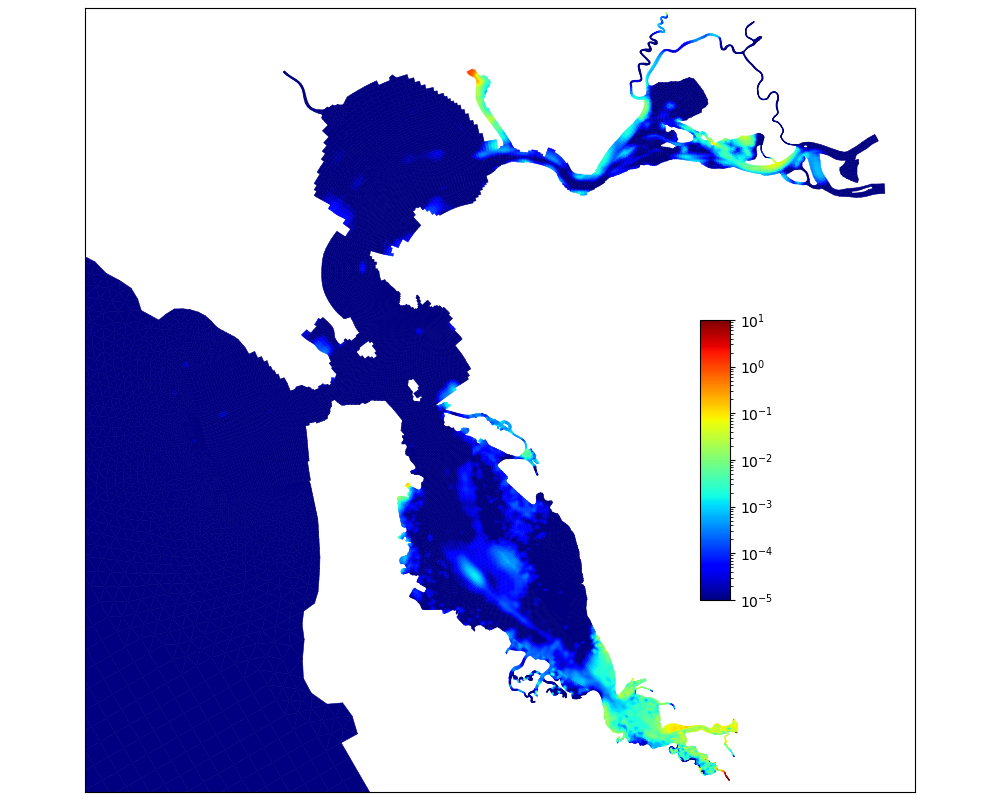

In [83]:
class BayConcFigure(object):
    figsize=(10,8)
    vmin=1e-5
    vmax=10
    zoom=(517521., 613202., 4139744., 4230105.)
    cax_loc=[0.7,0.25,0.03,0.35]
    num=None
    def __init__(self,conc,**kw):
        utils.set_keywords(self,kw)
                    
        self.fig=plt.figure(figsize=(10,8),num=self.num)
        self.ax=self.fig.add_subplot(1,1,1)
        
        self.ccoll=grid.plot_cells(values=conc.clip(self.vmin,self.vmax),
                                   cmap='jet',norm=colors.LogNorm(vmin=self.vmin,vmax=self.vmax),
                                   edgecolor='face',lw=0.4,ax=self.ax)
        self.cax=self.fig.add_axes(self.cax_loc)
        plt.colorbar(ccoll,cax=self.cax)
        self.ax.set_aspect('equal')
        self.ax.xaxis.set_visible(0)
        self.ax.yaxis.set_visible(0)
        self.ax.axis(self.zoom)
        self.fig.subplots_adjust(left=0.01,right=0.99,top=0.99,bottom=0.01)
bfig=BayConcFigure(conc)

In [49]:
bfig.ax.axis()


(517521.40813750634, 613202.8294969342, 4139744.556343159, 4230105.685174197)